In [1]:
from meta_opt.utils.experiment_utils import make, process_results, bcolors, plot, get_final_cparams

import os
import matplotlib.pyplot as plt
from IPython.display import HTML
import itertools
import dill as pkl

# Load

In [66]:
# configuration
CFG = {
    # training options are None because we arent training :)
    'workload': None,
    'num_iters': None,
    'eval_every': None,
    'num_eval_iters': None,
    'batch_size': None,
    'full_batch': True,
    'reset_every': None,

    # experiment options
    'experiment_name': 'wmt_fullbatch_clip',
    'load_checkpoint': True,
    'overwrite': False,  # whether to allow us to overwrite existing checkpoints or throw errors
    'directory': os.path.abspath("../"),
}
results = make(CFG)  # save to temp var `_results` so that we dont immediately overwrite `results` in case somethings wrong
# processed_results = process_results(CFG, results)
processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))

using cpu for jax
results will be stored at: /Users/evandigiorno/Desktop/meta-opt/data/wmt_fullbatch_clip_*.pkl
we will try to load experiment checkpoint first
	loaded checkpoint from /Users/evandigiorno/Desktop/meta-opt/data/wmt_fullbatch_clip_raw.pkl, containing ['cf_adam_1e-3_clip=1.0', 'cf_adam_2e-4_clip=1.0', 'cf_adam_6e-4_clip=1.0']
note: using full_batch means we will never eval


In [3]:
# from meta_opt.utils.experiment_utils import save_checkpoint
# ret = {}
# for k in results[0].keys():
#     ret[k] = [r[k][0] for r in results]
#     for i in range(len(results)):
#         ret[k][i]['args']['experiment_name'] = 'cifar_wd'
# save_checkpoint(CFG, ret)

In [68]:
baseline_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], 'wmt_fullbatch'), 'rb'))
r = {}
for k in baseline_results.keys(): 
    r[k] = baseline_results[k]
    if k not in processed_results: continue
    for _k, _v in processed_results[k].items():
        r[k][_k] = _v
processed_results = r

# baseline_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], 'wmt_base_baselines'), 'rb'))
# r = {}
# for k in baseline_results.keys(): 
#     r[k] = baseline_results[k]
#     if k not in processed_results: continue
#     for _k, _v in processed_results[k].items():
#         r[k][_k] = _v
# processed_results = r

# baseline_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], 'wmt_pretrained_cf_3'), 'rb'))
# r = {}
# for k in baseline_results.keys(): 
#     r[k] = baseline_results[k]
#     if k not in processed_results: continue
#     for _k, _v in processed_results[k].items():
#         r[k][_k] = _v
# processed_results = r

# Plot
Plot and also animate the values taken by the $\{M_h\}_{h=1}^H$ coefficients during training. Each $M_h$ multiplies a disturbance from $h$ training steps ago (i.e. 0 is most recent in this plot).

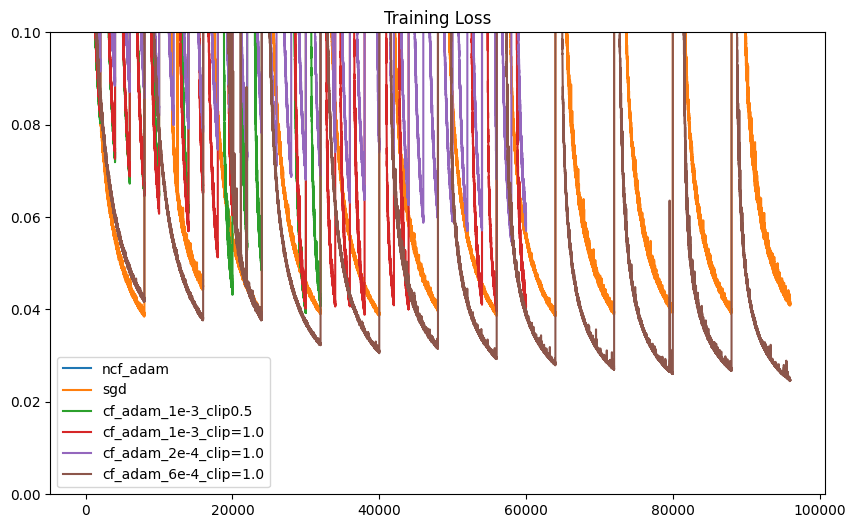

In [70]:
# ----------------------------------------
# plot a particular set of experiments
# ----------------------------------------
keys_to_plot = {
    # 'sgd': 'sgd',
    'momentum': 'momentum',
    'adamw': 'adamw',
    'dadamw': 'd-adap',
    'mechadamw': 'mechanic',
    # 'rmsprop',
    # 'hgd': 'hgd',
    'frozen': 'ours (frozen)',
    'cf': 'ours (finetuned)',
    'ncf': 'ours (noncounterfactual)',
    
    # custom ones
    'sgd_2.0': 'sgd',
    'cf_adam_frozen': 'ours (frozen)',
    'rsqrt_0.002': 'rsqrt',
    
}

plots_to_make = {
              'loss': 'Training Loss',
              # 'eval_loss': 'Evaluation Loss',
              # 'eval_acc': 'Evaluation Accuracy',
              # 'bleu': 'BLEU Score',
              # 'M': 'Learned Coefficients',
              # 'anim': 'Animation',
              # 'param_sq_norm': 'Sq Param Norm',
              # 'grad_sq_norm': 'Sq Grad Norm',
              # 'proj_grad_sq_norm': 'Proj Sq Grad Norm',
               # 'lr': 'Learning Rate',
}

# ----------------------------------------
# OR just plot em via regex
# ----------------------------------------
# keys_to_plot = '.*mech.*'  # specific regex
keys_to_plot = '.*'  # anything

# from copy import deepcopy
# import numpy as np
# q = deepcopy(processed_results)
T = 58000
# q['loss']['sgd']['t'] = np.array(q['loss']['sgd']['t']) + T
# (fig, ax), anim = plot(results, q, keys_to_plot, plots_to_make, anim_bounds=(-1.5, 0.5), smoothing=None)
# del q

(fig, ax), anim = plot(results, processed_results, keys_to_plot, plots_to_make, anim_bounds=(-1.5, 0.5), smoothing=None)
ax[0].set_ylim(0, 0.1)
# ax[0].set_xlim(T, T + 2000)
# ax[1].set_ylim(0.6, 0.95)
# ax[2].set_ylim(0.95, 0.99)
# ax[3].set_ylim(0.95, 0.99)
# ax[4].set_ylim(0, 1)
# ax[1].set_ylim(0, 0.01)
# plt.savefig('{}/figs/{}.pdf'.format(CFG['directory'], CFG['experiment_name']))
plt.show()

if anim is not None:
    h = HTML(anim.to_html5_video())
    display(h)

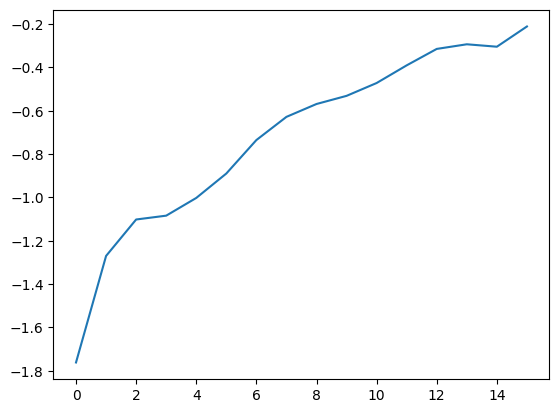

In [62]:
import matplotlib.pyplot as plt
M = processed_results['M']['cf_adam_1e-3_clip=1.0']['avg'][55000]
M = M[::-1]
M[0] -= 1.0
plt.plot(range(16), M)